## Statisitics Exercises

In [1]:
# Download required libraries

import numpy

# <h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

<h3 style="color: #001a79;">Exercise 3</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

<h1 style="color: rgb(0, 91, 94);">Statistics</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


<h2 style="color: rgb(0, 91, 94);">Lady Tasting Tea</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" style="border: 1px solid #ff791e" width="200px">

The Lady Tasting Tea problem was first described by <a href="http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html" style="color: #ff791e">Ronald A. Fisher</a> in his book The Design of Experiments.

He described the problem as follows.

> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.

> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

<h2 style="color: rgb(0, 91, 94);">Number of Combinations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let us investigate the number of ways in which the lady can arrange the eight cups into two groups of four.

The first group is the cups with milk first.

The second group is the cups with tea first.

Once we select four cups for the first group, the second group is made up of the remaining cups.

So, we only really need to count how many different ways there are to select four cups from eight.

<br>

To begin we give each of the eight cups a label from 0 to 7.

Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [2]:
# The eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

Suppose the subject is trying to pick the four cups with milk in first.

If the subject is picking the cups randomly then they are randomly picking one of seventy different options.

By randomly, we mean that they can not really tell which cups have the milk in first.

Therefore they have only a probability of 1/70 of getting the right answer.

The number of ways of selecting four unordered items from eight is given by the [Choose](http://mathworld.wolfram.com/Choose.html) function in mathematics.

In [3]:
# The number of ways of selecting four things from eight.
# where the order doesnt matter
(8*7*6*5)/(4*3*2*1)

# 8 cups: 0 1 2 3 4 5 6 7
# 4 spots:  _ _ _ _
# select t he 1st cup with tea in them. 1st most obvious is 2, then 0, then 7 then 5
# 4 spots: 2 0 7 5
#: 1st spot have 8 selection possibilities
#: 2nd spot have 7 selection possibilities
# 3rd spot: have 6 selection possibilities
#4th spot: have 5 selection possibilities
# (8*7*6*5) possibilities.
# Multiply is for every one of possibility for 1st spot are 7 choices of 2nd spot  thus *7
# (4*3*2*1)  i.e.  2-0-7-5 could also be 7-0-2-5 or 0-7-2-5 
# order assumed in 8*7*6*5. Therefore have to take in to account how many times have we double counted the same combination
# Order within group is not important.  Just that the cup is in the right group.
# i.e. 2-0-7-5 same as 0-2-7-5 (these are in the 4 cups of Group 1 (tea first)). 
# now need to  remove the potential duplicates
# /(4*3*2*1) does this
# result is 70 possibilities to select the cups at random
# one of these will get the 4 right cups in Group 1
# 1/70 chance or 1.4% she will get it right by chance

70.0

These possibilities can be enumerated using the combinations function from the itertools Python package.

It takes a list $l$ of items and a number $n$. It returns/generates each way of selecting $n$ unordered items from $l$.

In [4]:
import itertools
# package in python that returns/generateseach way of selecting n unordereditems from a list of elements/numbers n
# note itertools starts below with 0,1,2,3 but this is simply the computer way of displaying
# if this is remoevd no reason to start with 0,1,2,3

poss = list(itertools.combinations(cups, 4))
poss

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

<h2 style="color: rgb(0, 91, 94);">Hypotheses</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In the book, Fisher describes the *null hypothesis*.

It is the statement to be countered by the experiment.

In this case it is the hypothesis that the subject cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first.

<br>

**Null Hypothesis:** the subject can not tell if the cup had milk in it first or last.

<br>

Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true.

If it is very unlikely, then we may reject the null hypothesis.

Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.

<br>

**Alternative Hypothesis:** the subject can tell.

<br>

Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.

Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

In [5]:
# Only one of the 70 randomly selected possibilities is the desired result.
1 / 70

0.014285714285714285

<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

<h2 style="color: rgb(0, 91, 94);">Distribution</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We may be tempted to allow the possibility of rejecting the null hypothesis if the subject gets three cups right.

That would be a mistake, as the following plot shows.

It shows the null distribution, the number of ways of guessing for each number of correct cups.

We can see from the plot that there is ~20% chance of guessing at least three correct cups.

I don't think that's unlikely enough to reject the null hypothesis.

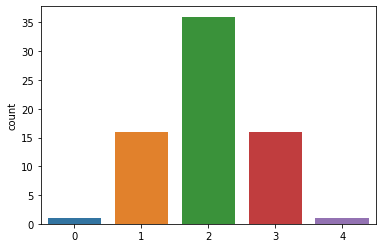

In [6]:
import random
import seaborn as sns

# Pick a random correct answer from the list of 70 to simulate the experiment. To be the 'milkfirst' cups. could have used 1st 4 but just showing random selection.
milkfirst = set(random.choice(poss))

# itertools combinations creates the random sets of 4
# set doesnt have order, doesnt keep count, can't have repeats

# Count the overlap (intersection) between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# give me the size of the overlaps either theres 0 overlap, 1 overlap, 2 overlaps, 3 overlaps, 4 overlaps etc
# Create the plot.(Null distribution)
sns.countplot(x=counts);

# 1 opportunity of 0 overlaps. milkfirst selection has none right.  Exact opposite
# 1 opportunity to get 4 right
# 37 overlap 2 (2 right)
# 15 overlap (1 right or 3 right)
# thus if  allow one cup choice wrong then 20% chance that they randomly select three correct ones based on chance alone
# null hypothesis is true is usually out at the tail (i.e. 5% CI)

<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

## new section week 3

---

<h2 style="color: rgb(0, 91, 94);">$t$-Tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


$t$-tests are among the most common statistical tests performed in world.

This notebook focuses on the practicalities of performing $t$-tests in Python.

For information about the $t$-test itself, I recommend reading [Laerd Statistics's Independent t-test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php).
$t$-tests are among the most common statistical tests performed in world.

<h2 style="color: rgb(0, 91, 94);">Packages</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

One of Python's strengths is the quality of numerical packages available.

In [7]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

<h2 style="color: rgb(0, 91, 94);">Simulated Data</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We can create fake data sets with specific properties to investigate numerical methods.

#### can play with mean and stddev of both data sets below and re-plot.
#### closer mean and greater stddev makes it more difficult to ascertain same or different populations
#### solution is to run the t-test

In [8]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
# Sample size.
N = 40

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,0.776539
1,A,1.538972
2,A,1.466671
3,A,0.854462
4,A,1.253812
...,...,...
75,B,1.404388
76,B,2.433829
77,B,1.687135
78,B,2.927812


<h2 style="color: rgb(0, 91, 94);">Visualisation</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

A good plot can quickly show us what the numbers look like.

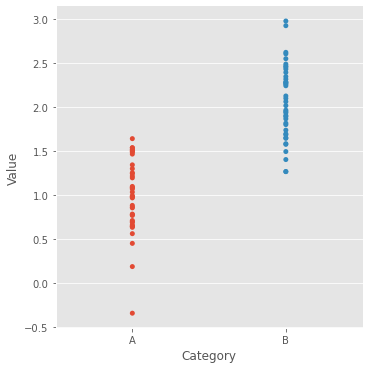

In [9]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

<h2 style="color: rgb(0, 91, 94);">The $t$-Test</h2>


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Running a t-test in Python is done with a single function call. You can use scipy or statsmodels, amongst others.

In [10]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -11.473586788209076	p-value: 2.0245147336453692e-18
P_scipy: 0.00


In [11]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -11.473586788209076	p-value: 2.0245147336453692e-18	Deg Free: 78.0
P_statsmodels: 0.00


In [12]:
# Calculate t statistic "by hand".
# https://en.wikipedia.org/wiki/Test_statistic

# Length of the arrays.
n1 = len(a)
n2 = len(b)

# Means of the samples.
m1 = np.sum(a) / n1
m2 = np.sum(b) / n2

# Sample standard deviations.
s1 = np.sqrt(np.sum((a - m1)**2) / (n1 - 1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n1 - 1))

df = n1 + n2 - 2
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1 - m2) / (np.sqrt(sp2) * np.sqrt(1.0/n1 + 1.0/n2))

t

-11.473586788209076

<h2 style="color: rgb(0, 91, 94);">Populations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$t$-tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

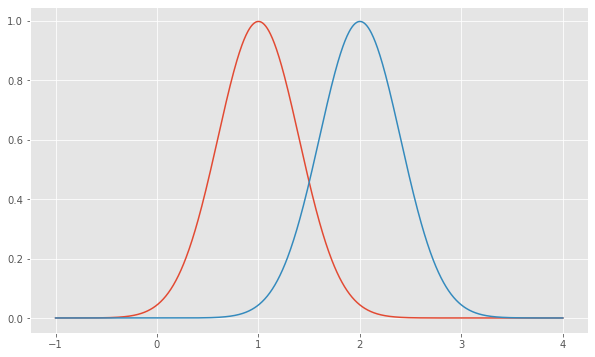

In [13]:
# Let's create a plot with the following x values.
min_x = min(m_a, m_b) - 5.0 * max(s_a, s_b)
max_x = max(m_a, m_b) + 5.0 * max(s_a, s_b)
x = np.linspace(min_x, max_x, 1000)

# We'll have plots of two different populations on one set of axes.
# These are normal probability density functions.
# See: https://en.wikipedia.org/wiki/Normal_distribution
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

# Create and show the plot.
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y_a)
ax.plot(x, y_b)
plt.show()

<h2 style="color: rgb(0, 91, 94);">Critical Value</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples.

If the probability of seeing such a $t$ value given the hypothesis that there is no difference between the means is low, then data is suggesting that you should reject that hypothesis.

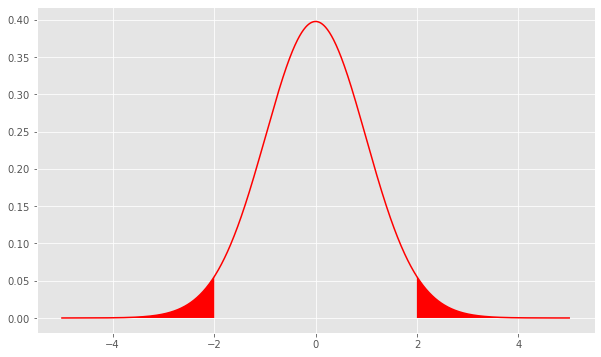

In [14]:
# The critical probability value.
critical = 0.05

# Create the figure.
fig, ax = plt.subplots(figsize=(10,6))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t, color='red')

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor="red")
ax.fill_between(tail_two['x'], tail_two['t'], 0, facecolor="red")

plt.show()

<h2 style="color: rgb(0, 91, 94);">Type I errors - False Positives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In [15]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.60%


<h2 style="color: rgb(0, 91, 94);">Type II errors - False Negatives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The chance of a false negative is harder to quantify.

It depends on how close the means are.

In [16]:
# Let's run 10000 t-tests where the population means are NOT equal.
# How often will we not reject the hypothesis?

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.1, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
notrejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is greater than critical, do not reject.
    if p > critical:
        notrejects = notrejects + 1

# Print results.
typeii = 100.0 * (notrejects / trials)
print(f"{typeii:0.2f}%")

35.51%


<h2 style="color: rgb(0, 91, 94);">Paired Samples</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Here we try a slightly different $t$ test - one based on repeated measures.

*References for this section:*

[Vincent Arel-Bundock's R datasets list](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

[t-test: Comparing Group Means](https://uc-r.github.io/t_test)

In [17]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [18]:
# Extract the first sample from the data set.
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [19]:
# Extract the second sample from the data set.
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [20]:
# Run a paired samples t-test.
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [21]:
# In one way, this is equivalent to a one sample t-test.
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [22]:
# That's how statsmodels suggests you do the test.
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

<h2 style="color: rgb(0, 91, 94);">Problems with multiple $t$-tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Suppose we want to compare three groups. The null hypothesis is that the population means are all equal. Can three $t$ tests be run in parallel?

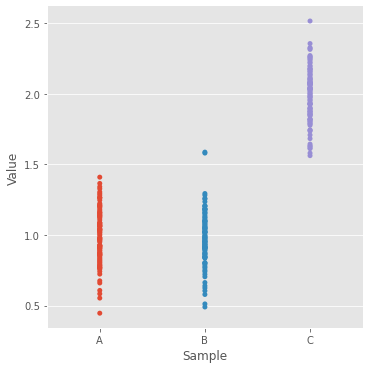

In [23]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [24]:
# t-Tests - one for each pair.
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.66	p_AC: 0.00	p_BC: 0.00


In [25]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the t-tests.
    t1, p1 = ss.ttest_ind(sample1, sample2)
    t2, p2 = ss.ttest_ind(sample1, sample3)
    t3, p3 = ss.ttest_ind(sample2, sample3)
    # If any is less than critical, reject.
    if p1 <= critical or p2 <= critical or p3 <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

12.29%


<h2 style="color: rgb(0, 91, 94);">Analaysis of Variance (ANOVA)</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

ANOVA can be used to avoid a higher Type I error rate.


In [26]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"F:{F:.2f} P:{P:.2f}")

F:917.69 P:0.00


In [27]:
# Let's run 10000 ANOVAs where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the test.
    F, p = ss.f_oneway(sample1, sample2, sample3)
    # If any is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.90%


<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>